<a href="https://colab.research.google.com/github/cullena20/emotion_detection/blob/main/EmotionDetection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection Part 2

In the last notebook I explored a dataset and trained a model to detect emotion from images of faces. Here I will go through actually applying this using the already trained model.

## Playing around with Face Recognition

In [23]:
!pip install face_recognition
import face_recognition 

Upload an image here.

In [25]:
from google.colab import files
image_file = files.upload()  # type(image) = dict
image_path = list(image_file.keys())[0]

Saving me_and_patrick.JPG to me_and_patrick (1).JPG


In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import PIL

In [27]:
image = mpimg.imread(image_path)
print(type(image))
print(image.shape) # the image I uploaded is 1536 pixels height and 2048 pixles wide and RGB

<class 'numpy.ndarray'>
(1536, 2048, 3)


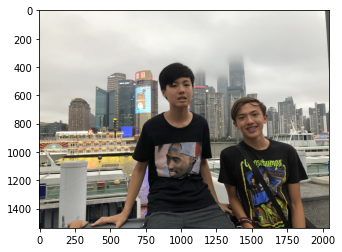

In [28]:
plt.imshow(image)

In [29]:
face_locations = face_recognition.face_locations(image)
top, right, bottom, left = face_locations[1]  # get second face detected
face_image = image[top:bottom, left:right]

In [30]:
# see what face_recognition.face_locations is returning
print(face_locations)

[(687, 1603, 910, 1380), (490, 1088, 676, 902)]


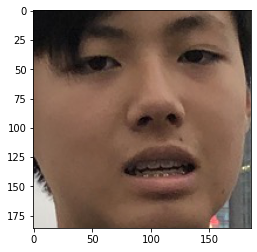

In [31]:
plt.imshow(face_image)

I'm converting to PIL image to resize it before turning it back into a numpy array (remember the image has to 48 * 48 * 3 to work with the model).

In [32]:
pil_face = PIL.Image.fromarray(face_image)
pil_face.thumbnail((48, 48))

In [33]:
face_image = np.array(pil_face)

In [34]:
# normalize the pixel values

face_image = face_image / 255

In [35]:
face_image.shape

(48, 48, 3)

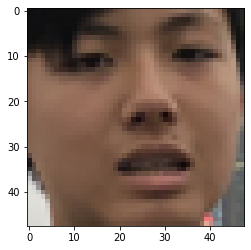

In [36]:
plt.imshow(face_image)

We need to expand the dimensions to make it work in our model. The first dimension represents the number of training examples. In this case, it will be one.

In [37]:
face_image = np.expand_dims(face_image, axis=0)
face_image.shape

(1, 48, 48, 3)

## Using our model

In [38]:
from keras.models import load_model
import matplotlib.pyplot as plt

Load the pretrained model architecture and weights. I am using the model that I built in the first emotion detection notebook.

In [39]:
# this may take a while
model_file = files.upload()

In [40]:
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [41]:
model = load_model('best_cnn_model.h5')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3

Use the model to make our prediction!

In [44]:
prediction = model.predict(face_image)

In [45]:
print(prediction)
print(np.max(prediction))
print(np.argmax(prediction))
print(emotion_labels[np.argmax(prediction)])

[[0.8718797  0.47909468 0.5542782  0.10432921 0.6370081  0.20385797
  0.60355455]]
0.8718797
0
Angry


## Putting it all together


Here's some functions and all the imports again to put it all together. Upload an image and voila!

In [14]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model
import PIL
!pip install face_recognition
import face_recognition




     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=3abde56709f82590fc236f190b035869d0d28cd2c33aa4b78d72fab9e1a50484
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [46]:
def get_faces(image_fp):
  image = mpimg.imread(image_fp)
  faces = list()
  face_locations = face_recognition.face_locations(image)
  for i in range(len(face_locations)):
    top, right, bottom, left = face_locations[i]
    face_image = image[top:bottom, left:right]
    faces.append(face_image)
  return faces

In [47]:
def process_faces(faces):
  processed_faces = list()
  for i in range(len(faces)):
    pil_face = PIL.Image.fromarray(faces[i])
    pil_face.thumbnail((48, 48))
    face_image = np.array(pil_face)
    face_image = face_image / 255
    face_image = np.expand_dims(face_image, axis=0)
    processed_faces.append(face_image)
  return processed_faces

In [48]:
def make_predictions(model, faces):
  emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
  predictions = list()
  for face in faces:
    prediction = model.predict(face)
    emotion = emotion_labels[np.argmax(prediction)]
    predictions.append(emotion)
  return predictions

In [49]:
def display_results(predictions, unprocessed_faces):
  for i in range(len(predictions)):
    plt.figure(figsize=(20,20))
    plt.subplot(2,6,i+1)
    plt.title(predictions[i])
    plt.axis('off')
    plt.imshow(unprocessed_faces[i])
  plt.show()

Upload the model and image here. 

In [19]:
# this may take a while
model_file = files.upload()
model_path = list(model_file.keys())[0]
model = load_model(model_path)

Saving best_cnn_model.h5 to best_cnn_model.h5


In [51]:
image_file = files.upload()
image_path = list(image_file.keys())[0]

Saving friendsonrock.jpg to friendsonrock (1).jpg


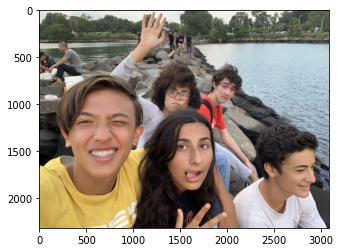

In [52]:
# testing
# HEIC images don't seem to work (even if you convert by changing extension manually)
# I'll need to get a way to convert this (maybe i don't need it's only a problem with airdrop)
image = mpimg.imread(image_path)
plt.imshow(image)

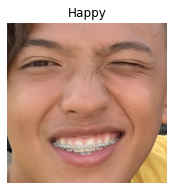

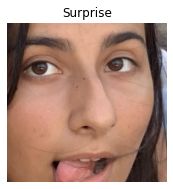

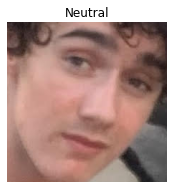

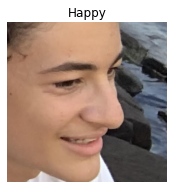

In [53]:
faces = get_faces(image_path)
processed_faces = process_faces(faces)
predictions = make_predictions(model, processed_faces)
display_results(predictions, faces)

## Up next!

So that's all the model training plus basic application stuff. Now I will make a website that allows a user to upload an image and returns an emotion plus shows the images. Maybe I will use opencv to draw a box around the images rather than cutting out the faces. Also some additional error handling stuff. 

I should get a way to get image path and stuff automatically.